# Name: MIke Mico
StdID: 3685120

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.isnull().values.any()

False

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

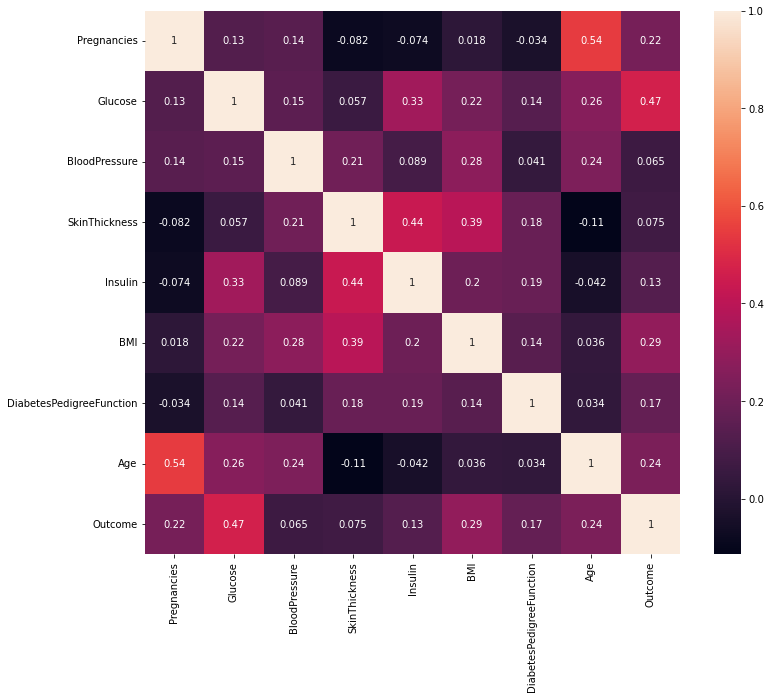

In [8]:
# correlation matrix
# remember, higher number, closer to 1 means stronger correlation. Negative values mean negative correlation

# what are some good features to try?

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)


In [11]:
# extract our labels and display
y = df["Outcome"]

# extract all the features and display
X = df.drop(["Outcome"], axis = 1)

In [12]:
# list columns, for dropping selection
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [13]:
X = X.drop(['Pregnancies','SkinThickness','BloodPressure','DiabetesPedigreeFunction'], axis = 1)
X

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


In [18]:
# lets do 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.2,shuffle=True)

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

79.95% in training set
20.05% in test set


In [52]:
# vectorize the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB

classifier_TT = GaussianNB()

In [53]:
classifier_TT.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier_TT.predict(X_test)

In [55]:
# calculate Accuracy - the percentage of labels that the model predicted correctly

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.7857


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
# display the confusion matrix
#
# TP FP
# FN TN


confusion_matrix(y_test, y_pred)

array([[93, 13],
       [20, 28]])

Prediction on test data:



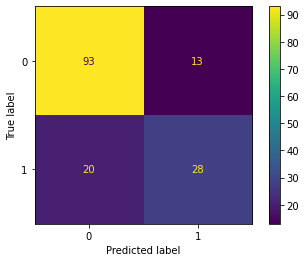

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=classifier_TT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier_TT.classes_)
print('Prediction on test data:\n')
disp.plot()
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# emphasize a high precision score if you care about false positives, i.e. accusing someone of stealing
# emphasize a high recall score if you care about false negatives. i.e. not detecting a disease


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.68      0.58      0.63        48

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

